In [ ]:
pwd

'/content'

In [ ]:
%cd /content/food-101

/content/food-101


In [ ]:
import requests
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

print ("Dependencies Imported")

Dependencies Imported


In [ ]:
print(tf.__version__)
print(tf.test.gpu_device_name())
api_url = 'https://api.calorieninjas.com/v1/nutrition?query='
query = 'french fries'
response = requests.get(api_url + query, headers={'X-Api-Key': 's9S3fiY9BWYZtpCebS71Rg==Qk1nbauJKhKE9k8R'})
if response.status_code == requests.codes.ok:
    print(response.text)
else:
    print("Error:", response.status_code, response.text)

2.4.1
/device:GPU:0
{"items": [{"sugar_g": 0.3, "fiber_g": 3.8, "serving_size_g": 100.0, "sodium_mg": 209, "name": "french fries", "potassium_mg": 123, "fat_saturated_g": 2.3, "fat_total_g": 14.4, "calories": 312.5, "cholesterol_mg": 0, "protein_g": 3.4, "carbohydrates_total_g": 42.1}]}


In [ ]:
def get_data_extract():
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [ ]:
get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

In [ ]:
!ls food-101/

images	license_agreement.txt  meta  README.txt


In [ ]:
os.listdir('food-101/images')

['risotto',
 'beignets',
 'onion_rings',
 'cup_cakes',
 'croque_madame',
 'omelette',
 'sashimi',
 'takoyaki',
 'ice_cream',
 'frozen_yogurt',
 'macarons',
 'hamburger',
 'bibimbap',
 'clam_chowder',
 'crab_cakes',
 'paella',
 'escargots',
 'caesar_salad',
 'lasagna',
 'samosa',
 'fish_and_chips',
 'creme_brulee',
 'french_toast',
 'pad_thai',
 'beet_salad',
 'french_onion_soup',
 'nachos',
 'edamame',
 'eggs_benedict',
 'gnocchi',
 'grilled_cheese_sandwich',
 'prime_rib',
 'ramen',
 'chocolate_mousse',
 'waffles',
 'dumplings',
 'french_fries',
 'bread_pudding',
 'steak',
 'cheesecake',
 'club_sandwich',
 'ravioli',
 'pizza',
 'red_velvet_cake',
 'lobster_bisque',
 'garlic_bread',
 'beef_tartare',
 'grilled_salmon',
 'greek_salad',
 'oysters',
 'guacamole',
 'chocolate_cake',
 'cheese_plate',
 'shrimp_and_grits',
 'pulled_pork_sandwich',
 'filet_mignon',
 'pho',
 'donuts',
 'chicken_curry',
 'lobster_roll_sandwich',
 'fried_rice',
 'baklava',
 'pork_chop',
 'strawberry_shortcake',
 's

In [ ]:
os.listdir('food-101/meta')

['test.txt',
 'train.txt',
 'train.json',
 'test.json',
 'labels.txt',
 'classes.txt']

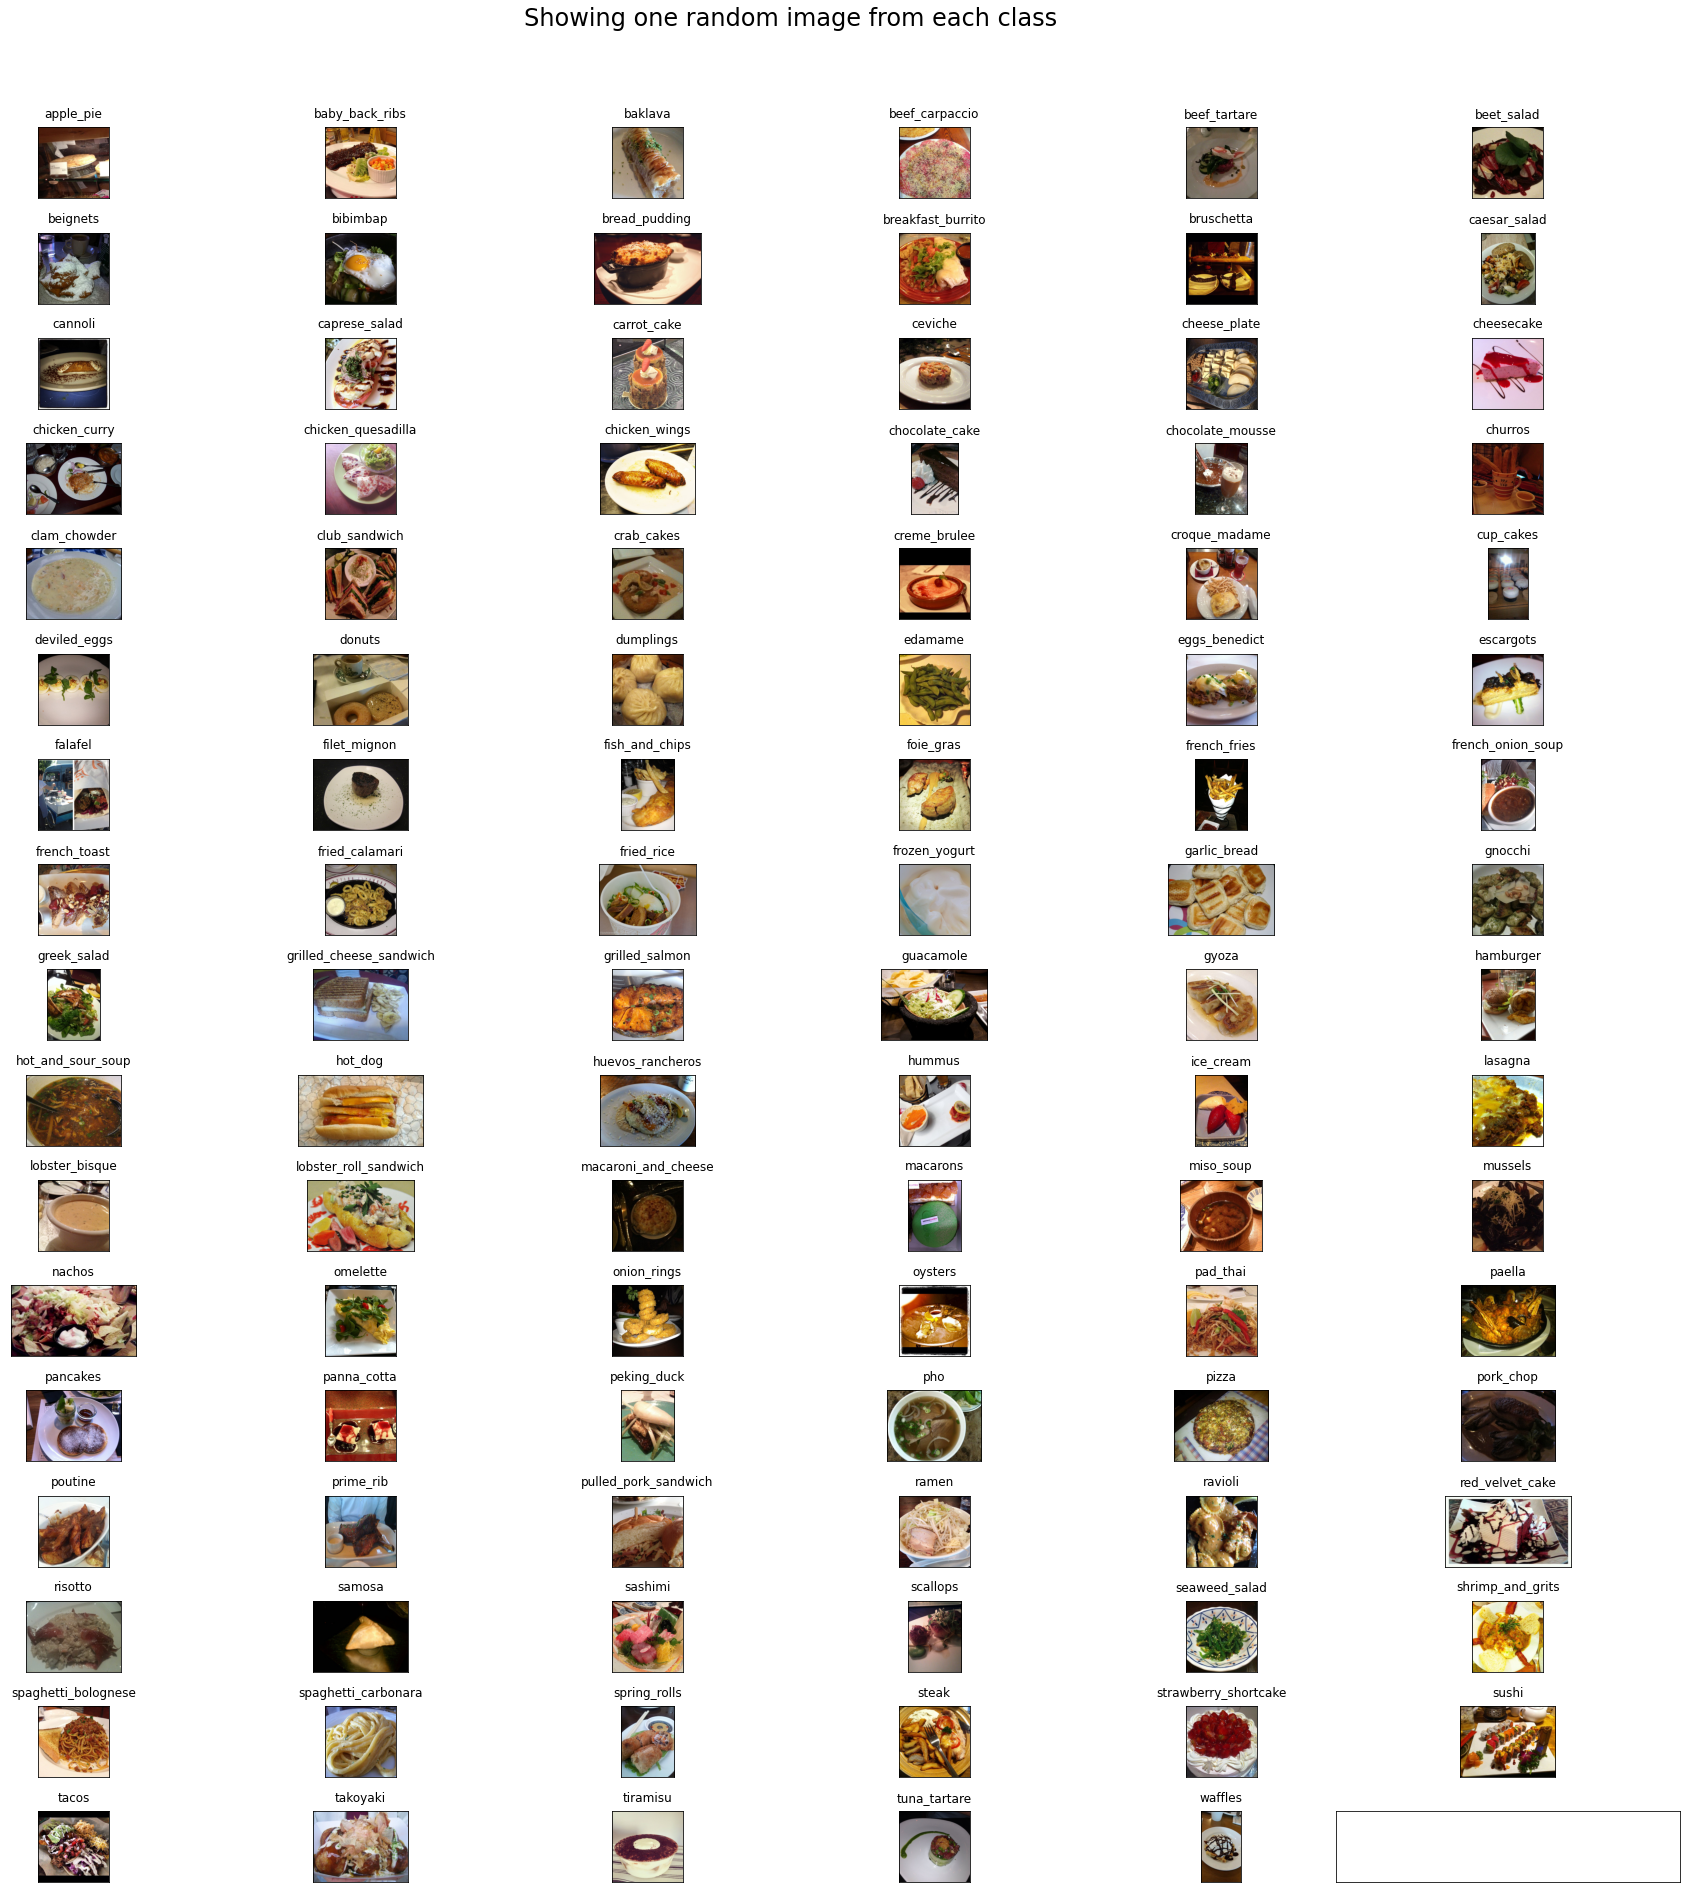

In [ ]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### **Split the image data into train and test using train.txt and test.txt**

In [ ]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
pwd

'/'

In [ ]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
%cd /
print("Creating train data...")
prepare_data('/content/food-101/meta/train.txt', '/content/food-101/images', 'train')

/
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying 

In [ ]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('/content/food-101/meta/test.txt', '/content/food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [ ]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [ ]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [ ]:
foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [ ]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [ ]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()
        print(pred_value)
        
    api_url = 'https://api.calorieninjas.com/v1/nutrition?query='
    query = pred_value.replace("_"," ")
    response = requests.get(api_url + query, headers={'X-Api-Key': 's9S3fiY9BWYZtpCebS71Rg==Qk1nbauJKhKE9k8R'})
    if response.status_code == requests.codes.ok:
        print(response.text)
    else:
        print("Error:", response.status_code, response.text)
        
    

In [ ]:
# Helper function to select n random food classes
def pick_n_random_classes(n):
  # food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  return food_list
  

In [ ]:
# Lets try with more classes than just 3. Also, this time lets randomly pick the food classes
n = 10
food_list = pick_n_random_classes(n)
food_list = ['donuts',
 'french_fries',
 'fried_rice',
 'hamburger',
 'hot_dog',
 'pizza',
 'samosa',
 'spring_rolls',
 'sushi',
 'waffles']
print("These are the randomly picked food classes we will be training the model on...\n", food_list)

These are the randomly picked food classes we will be training the model on...
 ['donuts', 'french_fries', 'fried_rice', 'hamburger', 'hot_dog', 'pizza', 'samosa', 'spring_rolls', 'sushi', 'waffles']


In [ ]:
# picking 3 food items and generating separate data folders for the same
# food_list = ['apple_pie','pizza','omelette']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [ ]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

Creating training data folder with new classes...
Copying images into donuts
Copying images into french_fries
Copying images into fried_rice
Copying images into hamburger
Copying images into hot_dog
Copying images into pizza
Copying images into samosa
Copying images into spring_rolls
Copying images into sushi
Copying images into waffles


In [ ]:
print("Total number of samples in train folder")
!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
7500


In [ ]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into donuts
Copying images into french_fries
Copying images into fried_rice
Copying images into hamburger
Copying images into hot_dog
Copying images into pizza
Copying images into samosa
Copying images into spring_rolls
Copying images into sushi
Copying images into waffles


In [ ]:
print("Total number of samples in test folder")
!find test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
2500


In [ ]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes
K.clear_session()

n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 7500 #75750
nb_validation_samples = 2500 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_10class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_10class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_10class.hdf5')


In [ ]:
class_map_11 = train_generator.class_indices
class_map_11

{'donuts': 0,
 'french_fries': 1,
 'fried_rice': 2,
 'hamburger': 3,
 'hot_dog': 4,
 'pizza': 5,
 'samosa': 6,
 'spring_rolls': 7,
 'sushi': 8,
 'waffles': 9}

In [ ]:
history.history

{'accuracy': [0.40312665700912476,
  0.7128540873527527,
  0.7771245241165161,
  0.8258952498435974,
  0.8389898538589478,
  0.8587653636932373,
  0.8762694001197815,
  0.8861571550369263,
  0.8897648453712463,
  0.9055318236351013,
  0.909807562828064,
  0.9179583191871643,
  0.92838054895401,
  0.9310529232025146,
  0.9342597723007202,
  0.9410743117332458,
  0.9430785775184631,
  0.9489578008651733,
  0.9504275918006897,
  0.9549705982208252,
  0.9603153467178345,
  0.9576429724693298,
  0.9652591943740845,
  0.9649919867515564,
  0.9707375764846802,
  0.9700694680213928,
  0.9699358344078064,
  0.9742116332054138,
  0.9730091094970703,
  0.9766167998313904],
 'loss': [2.0087177753448486,
  1.1922587156295776,
  0.8684820532798767,
  0.7111581563949585,
  0.6348716020584106,
  0.5732907652854919,
  0.5227071642875671,
  0.48586583137512207,
  0.45567503571510315,
  0.41568583250045776,
  0.39442119002342224,
  0.3760068416595459,
  0.3437238335609436,
  0.33176276087760925,
  0.3229

In [ ]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

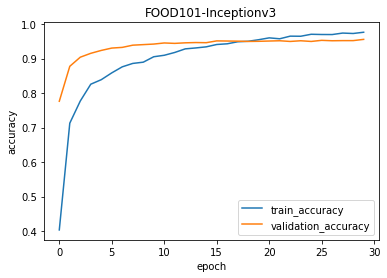

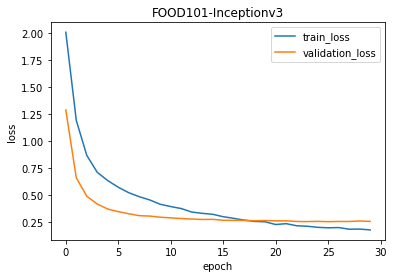

In [40]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [42]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('best_model_10class.hdf5',compile = False)

    

CPU times: user 2.15 s, sys: 84.3 ms, total: 2.24 s
Wall time: 2.25 s


In [43]:
# Downloading images from internet using the URLs
!wget -O fries.jpg https://wallpapercave.com/wp/wp3031767.jpg
!wget -O springrolls.jpg https://howtofeedaloon.com/wp-content/uploads/2016/02/bibimbap-1.jpg
!wget -O pizza.jpg https://i.pinimg.com/originals/43/0f/83/430f83bfa304c69f4f6c96abbb38223e.jpg
!wget -O garlicbread.jpg https://tableagent.s3.amazonaws.com/media/crumbs/xl/229_93.jpg

# If you have an image in your local computer and want to tr


# from google.colab import files
# image = files.upload()

--2021-03-28 18:34:07--  https://wallpapercave.com/wp/wp3031767.jpg
Resolving wallpapercave.com (wallpapercave.com)... 104.26.8.2, 172.67.71.70, 104.26.9.2, ...
Connecting to wallpapercave.com (wallpapercave.com)|104.26.8.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193502 (189K) [image/jpeg]
Saving to: ‘fries.jpg’

fries.jpg           100%[===================>] 188.97K  --.-KB/s    in 0.1s    

2021-03-28 18:34:07 (1.47 MB/s) - ‘fries.jpg’ saved [193502/193502]

--2021-03-28 18:34:07--  https://howtofeedaloon.com/wp-content/uploads/2016/02/bibimbap-1.jpg
Resolving howtofeedaloon.com (howtofeedaloon.com)... 104.18.23.44, 104.18.22.44, 2606:4700::6812:172c, ...
Connecting to howtofeedaloon.com (howtofeedaloon.com)|104.18.23.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 157759 (154K) [image/jpeg]
Saving to: ‘springrolls.jpg’

springrolls.jpg     100%[===================>] 154.06K  --.-KB/s    in 0.01s   

2021-03-28 18:34:08 (

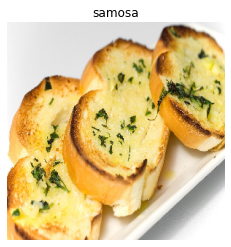

samosa
{"items": [{"sugar_g": 1.6, "fiber_g": 2.1, "serving_size_g": 100.0, "sodium_mg": 426, "name": "samosa", "potassium_mg": 52, "fat_saturated_g": 7.1, "fat_total_g": 17.4, "calories": 260.8, "cholesterol_mg": 27, "protein_g": 3.5, "carbohydrates_total_g": 24.2}]}


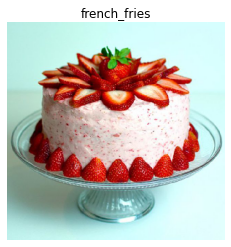

french_fries
{"items": [{"sugar_g": 0.3, "fiber_g": 3.8, "serving_size_g": 100.0, "sodium_mg": 209, "name": "french fries", "potassium_mg": 123, "fat_saturated_g": 2.3, "fat_total_g": 14.4, "calories": 312.5, "cholesterol_mg": 0, "protein_g": 3.4, "carbohydrates_total_g": 42.1}]}


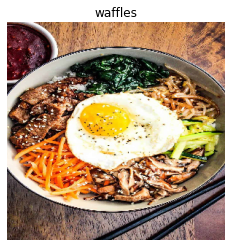

waffles
{"items": [{"sugar_g": 0.0, "fiber_g": 0.0, "serving_size_g": 100.0, "sodium_mg": 501, "name": "waffles", "potassium_mg": 192, "fat_saturated_g": 2.9, "fat_total_g": 14.0, "calories": 299.3, "cholesterol_mg": 68, "protein_g": 7.8, "carbohydrates_total_g": 32.3}]}


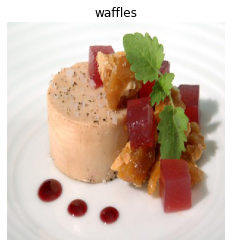

waffles
{"items": [{"sugar_g": 0.0, "fiber_g": 0.0, "serving_size_g": 100.0, "sodium_mg": 501, "name": "waffles", "potassium_mg": 192, "fat_saturated_g": 2.9, "fat_total_g": 14.0, "calories": 299.3, "cholesterol_mg": 68, "protein_g": 7.8, "carbohydrates_total_g": 32.3}]}


In [44]:
# Make a list of downloaded images and test the trained model
images = []
images.append('fries.jpg')
images.append('pizza.jpg')
images.append('springrolls.jpg')
images.append('garlicbread.jpg')
predict_class(model_best, images, True)

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (